<a href="https://colab.research.google.com/github/jacksonchen1998/NTUT-Machine-Leraning-Course/blob/main/%E3%80%8CHomework_02_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Follow the lecture notes to write a program to draw the curve of probability with respect to 𝜃 = 𝑃({H}) for the coin sequence of {H, T, T, T, H, H, H}.

Based on the curve, what is 𝜃̂, the ML estimate of 𝜃.


In [ ]:
import numpy as np
def flip_coin(times=1000, bias=0.5):
    tosses  = list(np.random.binomial(1, bias, times))
    mapping = {0:"tails", 1:"heads"}
    tosses  = np.vectorize(mapping.get)(tosses)
    return list(tosses)

In [ ]:
from collections import Counter # Used to count the number for the coin

def mle_estimate(total_heads, total_tails):
    return total_heads/(total_heads+total_tails)


def sequential_mle_estimates(tosses): # Calculating with MLE method
    estimates = []
    total_heads = 0
    total_tails = 0
    for i in range(len(tosses)):
        if tosses[i]=='heads':
            total_heads+=1
        else:
            total_tails+=1
        estimates.append(mle_estimate(total_heads, total_tails))
    return estimates

In [ ]:
theta = 4/7 # Based on the sequence of hit probability H, T, T, T, H, H, H
total_tosses = 10000 # Toss the coin 10000 times

coin_flips = flip_coin(total_tosses, theta)
mle_estimates = sequential_mle_estimates(coin_flips)

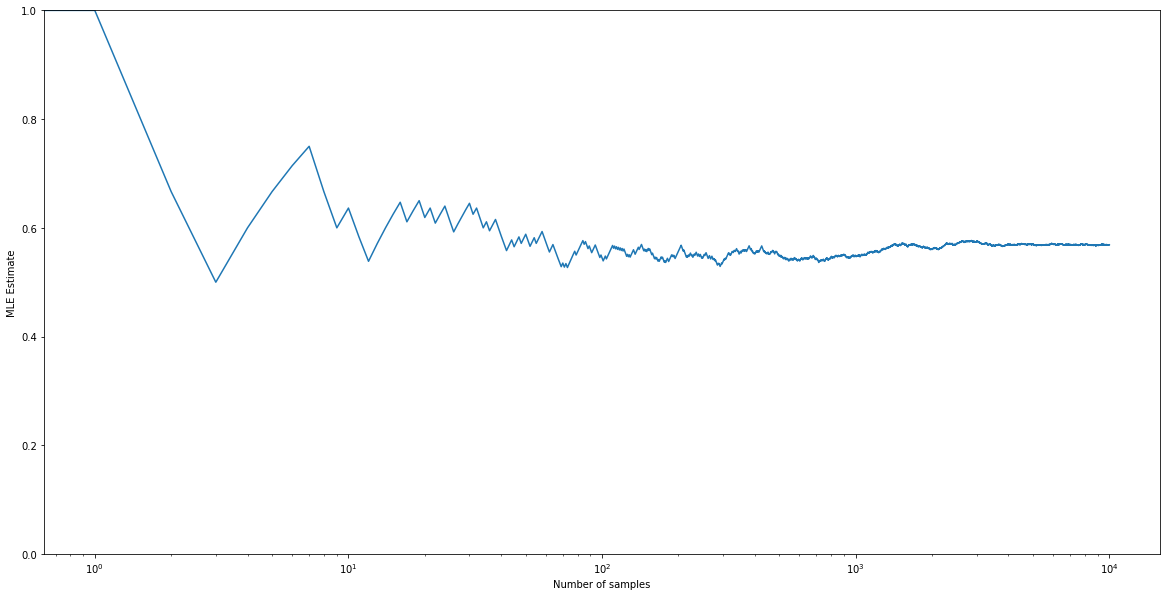

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_estimates(estimates_all_exp, y_name = "Estimated theta"):
    matplotlib.rc('figure', figsize=(20, 10))
    plt.ylim(top=1) # The maximum y axis, 1 set as head
    plt.ylim(bottom=0) # The minimum y axis, 0 set as tails
    plt.xlabel("Number of samples")
    plt.ylabel(y_name)
    plt.xscale("log") # Set x axis's curve
    for each_exp_estimates in estimates_all_exp:
        plt.plot(each_exp_estimates)
    plt.show()    
plot_estimates([mle_estimates], "MLE Estimate")